In [33]:
# importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

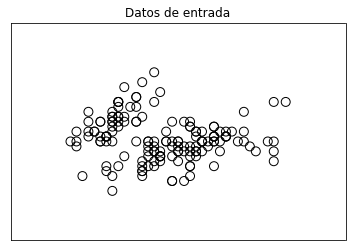

In [29]:
from sklearn import datasets
iris = datasets.load_iris()   #Se carga la base de datos
X = iris.data[:,:]        #La matriz de datos (solo se toman 2 carac. para la visualización)
y = iris.target               #las etiquetas


#visualizamos los datos para observar la dispersión 

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',facecolors = 'none',edgecolors = 'black',s = 80)

#En el eje X la caracteristica 0
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1

#En el eje Y la caracteristica 1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

plt.title('Datos de entrada')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.xticks(())
plt.yticks(())
plt.show()

In [30]:
# definimos el número de clusters o grupos
num_cluster = 4
#generamos el modelo 

#init establece el método de localizacion inicial de los centroides
modelo_kmeans= KMeans(init = 'k-means++',n_clusters = num_cluster, n_init=10)

#entrenar el modelo 
modelo_kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 2 0 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]


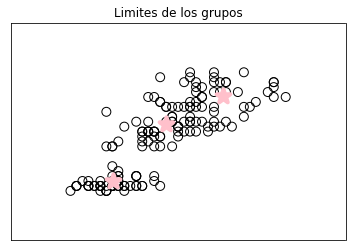

In [25]:
# visualizaos el resultado

#primero definimos el paso de la malla
paso = 0.01

#punto extremos de la malla
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

#Asignamos los valores a la malla
x_vals,y_vals = np.meshgrid(np.arange(x_min,x_max,paso),np.arange(y_min,y_max,paso))

#Predecimos la salida para cada punto de la malla
salida = modelo_kmeans.predict(X) #choricito
#salida = salida.reshape(x_vals.shape) #convertir en el 

print(salida)

#figura
plt.figure()
#borrar el contenido de la figura con handle "figure"
plt.clf()

#para definir el fondo
#plt.imshow(salida,interpolation='nearest',extent=(x_vals.min(),x_vals.max(),y_vals.min(),y_vals.max()),cmap=plt.cm.Set3,aspect='auto',origin ='lower')

#para hacer las bolitas
plt.scatter(X[:,0],X[:,1],marker='o',facecolors ='none',edgecolors = 'black',s =80)

#centros
centroides = modelo_kmeans.cluster_centers_
#dibujar las bolitas
plt.scatter(centroides[:,0],centroides[:,1],marker = '*',s=210,linewidths = 4,facecolors='pink')

plt.title('Limites de los grupos')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.xticks(())
plt.yticks(())
plt.show()



In [34]:

fig = pl.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
